### Jacqui Unciano (jdu5sq@virginia.edu) DS 5001 Spring 2024

### Importing

In [1]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import plotly_express as px
import seaborn as sns
sns.set(style='ticks')

import configparser
config = configparser.ConfigParser()

config.read("../final_project_files/env.ini")
data_home = config['DEFAULT']['data_home']
output_dir = config['DEFAULT']['output_dir']

In [2]:
colors = "YlGnBu"
OHCO = ['book_title', 'chap_num']

In [3]:
tfidf_books = pd.read_csv(f"{output_dir}\\l2_norm_books.csv").set_index(OHCO[:1])
tfidf_chaps = pd.read_csv(f"{output_dir}\\l2_norm_chaps.csv").set_index(OHCO[:2])

In [4]:
tfidf_books.head()

frail  generous  peaceful    wooden   hopeful  \
book_title                                                               
01_a_game_of_thrones  0.028095  0.023237  0.023237  0.061131  0.015862   
01_into_the_wild      0.000000  0.018621  0.000000  0.000000  0.000000   
01_the_fire_within    0.000000  0.023052  0.053525  0.069156  0.046104   
02_a_clash_of_kings   0.035355  0.027686  0.019724  0.058489  0.022899   
02_fire_and_ice       0.000000  0.019590  0.019590  0.000000  0.045487   

                           ten       fit      wiry  unfamiliar      foul  ...  \
book_title                                                                ...   
01_a_game_of_thrones  0.053616  0.047040  0.015862    0.015862  0.028095  ...   
01_into_the_wild      0.018621  0.029513  0.018621    0.055862  0.037241  ...   
01_the_fire_within    0.064715  0.000000  0.000000    0.000000  0.000000  ...   
02_a_clash_of_kings   0.061429  0.043979  0.022899    0.009862  0.034117  ...   
02_fire_and_ice       0.019590  0.045487  0.000000    0.039180  0.000000  ...   

                      dignified     crazy    nicked  unbearable  freckled  \
book_title                                                                  
01_a_game_of_thrones   0.018213  0.000000  0.018213    0.000000  0.036426   
01_into_the_wild       0.033888  0.000000  0.000000    0.033888  0.000000   
01_the_fire_within     0.000000  0.066494  0.000000    0.000000  0.000000   
02_a_clash_of_kings    0.000000  0.000000  0.017948    0.000000  0.028447   
02_fire_and_ice        0.000000  0.000000  0.000000    0.000000  0.000000   

                      minimal   sadeyed     beady  darkhaired  joyous  
book_title                                                             
01_a_game_of_thrones      0.0  0.018213  0.018213    0.036426     0.0  
01_into_the_wild          0.0  0.000000  0.000000    0.000000     0.0  
01_the_fire_within        0.0  0.000000  0.041953    0.000000     0.0  
02_a_clash_of_kings       0.0  0.000000  0.000000    0.000000     0.0  
02_fire_and_ice           0.0  0.000000  0.000000    0.000000     0.0  

[5 rows x 1000 columns]

In [5]:
tfidf_chaps.head()

old      much        ve    little  \
book_title           chap_num                                           
01_a_game_of_thrones 1         0.075798  0.025102  0.039465  0.056606   
                     2         0.087086  0.053051  0.033200  0.065014   
                     3         0.118264  0.000000  0.000000  0.060288   
                     4         0.086109  0.039196  0.000000  0.048035   
                     5         0.064409  0.043682  0.043328  0.053532   

                                   last         m     small      hard  \
book_title           chap_num                                           
01_a_game_of_thrones 1         0.048364  0.055333  0.000000  0.089861   
                     2         0.032244  0.031775  0.056337  0.072138   
                     3         0.059800  0.000000  0.096575  0.042206   
                     4         0.075517  0.000000  0.041624  0.079948   
                     5         0.061646  0.000000  0.000000  0.047072   

                                   good     great  ...  identical  wondrous  \
book_title           chap_num                      ...                        
01_a_game_of_thrones 1         0.023408  0.062912  ...        0.0       0.0   
                     2         0.000000  0.036128  ...        0.0       0.0   
                     3         0.057886  0.067004  ...        0.0       0.0   
                     4         0.036550  0.042307  ...        0.0       0.0   
                     5         0.066432  0.069072  ...        0.0       0.0   

                               chivalrous  overwhelming  deepset  wouldbe  \
book_title           chap_num                                               
01_a_game_of_thrones 1                0.0           0.0      0.0      0.0   
                     2                0.0           0.0      0.0      0.0   
                     3                0.0           0.0      0.0      0.0   
                     4                0.0           0.0      0.0      0.0   
                     5                0.0           0.0      0.0      0.0   

                               widowed  latter  tragic    absent  
book_title           chap_num                                     
01_a_game_of_thrones 1             0.0     0.0     0.0  0.000000  
                     2             0.0     0.0     0.0  0.000000  
                     3             0.0     0.0     0.0  0.000000  
                     4             0.0     0.0     0.0  0.000000  
                     5             0.0     0.0     0.0  0.136795  

[5 rows x 1000 columns]

In [6]:
LIB = pd.read_csv(f"{output_dir}\\LIB_LABELS.csv").set_index(OHCO[:1])

In [7]:
LIB.head()

book_length  n_chaps                  series  year  \
book_title                                                                 
01_a_game_of_thrones       297169       73                  ASOIAF  1996   
01_into_the_wild            64386       26            Warrior_Cats  2003   
01_the_fire_within          51223       42  Last_Dragon_Chronicles  2001   
02_a_clash_of_kings        324987       70                  ASOIAF  1998   
02_fire_and_ice             73544       31            Warrior_Cats  2003   

                                  author  \
book_title                                 
01_a_game_of_thrones  George R.R. Martin   
01_into_the_wild               Kate Cary   
01_the_fire_within         Chris D'Lacey   
02_a_clash_of_kings   George R.R. Martin   
02_fire_and_ice                Kate Cary   

                                                                label  \
book_title                                                              
01_a_game_of_thrones  George R.R. Martin: 01_a_game_of_thrones (1996)   
01_into_the_wild                   Kate Cary: 01_into_the_wild (2003)   
01_the_fire_within           Chris D'Lacey: 01_the_fire_within (2001)   
02_a_clash_of_kings    George R.R. Martin: 02_a_clash_of_kings (1998)   
02_fire_and_ice                     Kate Cary: 02_fire_and_ice (2003)   

                      y_raw_3  y_L2_3  y_raw_4  y_L2_4  
book_title                                              
01_a_game_of_thrones        1       2        1       1  
01_into_the_wild            0       1        2       0  
01_the_fire_within          0       0        3       2  
02_a_clash_of_kings         1       2        1       1  
02_fire_and_ice             0       1        2       0

### PCA Components

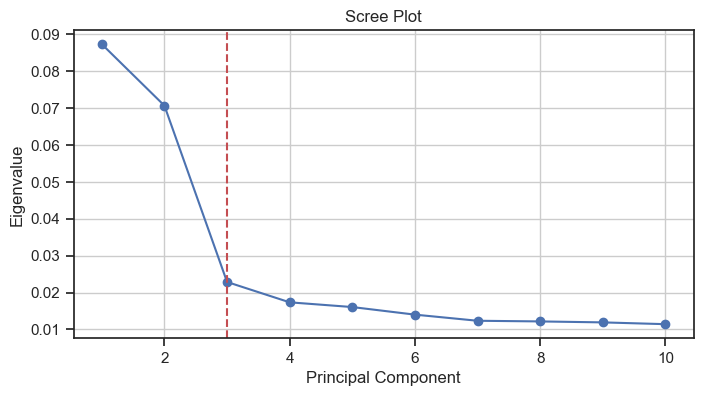

In [8]:
import numpy as np
import matplotlib.pyplot as plt

X = tfidf_books.fillna(0)

pca = PCA(n_components=10).fit(X)

# Eigenvalues
eigenvalues = pca.explained_variance_

# Creating a Scree plot
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, 'o-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

# Optional: Add a line to emphasize the "elbow"
plt.axvline(x=3, color='r', linestyle='--')

plt.grid(True)
plt.show()

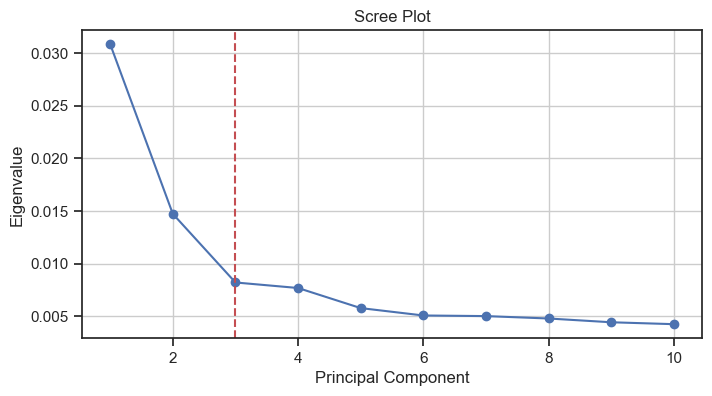

In [9]:
X = tfidf_chaps.fillna(0)

pca = PCA(n_components=10).fit(X)

# Eigenvalues
eigenvalues = pca.explained_variance_

# Creating a Scree plot
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, 'o-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

# Optional: Add a line to emphasize the "elbow"
plt.axvline(x=3, color='r', linestyle='--')

plt.grid(True)
plt.show()

In [10]:
n_comps = 3
pca_engine = PCA(n_components=n_comps)

In [11]:
pca = pca_engine.fit_transform(tfidf_books.fillna(0))

In [12]:
pca2 = pca_engine.fit_transform(tfidf_chaps.fillna(0))

In [13]:
pca_df = pd.DataFrame(pca, columns=[f'PC{i+1}' for i in range(pca.shape[1])])
pca2_df = pd.DataFrame(pca2, columns=[f'PC{i+1}' for i in range(pca2.shape[1])])

In [14]:
pca_df.to_csv(f"{output_dir}\\pca_books.csv")
pca2_df.to_csv(f"{output_dir}\\pca_chaps.csv")

### PCA DCM

In [15]:
DCM = pd.DataFrame(pca, index=tfidf_books.index)
DCM.columns = ['PC{}'.format(i) for i in DCM.columns]
DCM = DCM.join(LIB[['author','label']], on='book_title')
DCM.reset_index(inplace=True)
DCM['year'] = DCM.label.str.split(', ').str[0].str.split(' ').str[-1]
DCM.set_index(['book_title'], inplace=True)

DCM2 = pd.DataFrame(pca2, index=tfidf_chaps.index)
DCM2.columns = ['PC{}'.format(i) for i in DCM2.columns]
DCM2 = DCM2.join(LIB[['author','label']], on='book_title')
DCM2.reset_index(inplace=True)
DCM2['year'] = DCM2.label.str.split(', ').str[0].str.split(' ').str[-1]
DCM2['label'] = DCM2.label.str.split(', ').str[0].str.split('_').str[0] + ' - ' +  DCM2.chap_num.astype('str')
DCM2.set_index(['book_title', 'chap_num'], inplace=True)

In [16]:
DCM.head(2)

PC0       PC1       PC2              author  \
book_title                                                               
01_a_game_of_thrones  0.345462 -0.241794  0.016663  George R.R. Martin   
01_into_the_wild     -0.324306 -0.187549  0.004605           Kate Cary   

                                                                label    year  
book_title                                                                     
01_a_game_of_thrones  George R.R. Martin: 01_a_game_of_thrones (1996)  (1996)  
01_into_the_wild                   Kate Cary: 01_into_the_wild (2003)  (2003)

In [17]:
DCM2.head(2)

PC0       PC1       PC2  \
book_title           chap_num                                 
01_a_game_of_thrones 1         0.173287  0.006185  0.167445   
                     2         0.132191  0.049645  0.153794   

                                           author                       label  \
book_title           chap_num                                                   
01_a_game_of_thrones 1         George R.R. Martin  George R.R. Martin: 01 - 1   
                     2         George R.R. Martin  George R.R. Martin: 01 - 2   

                                 year  
book_title           chap_num          
01_a_game_of_thrones 1         (1996)  
                     2         (1996)

In [18]:
def vis_pcs(M, a, b, label='author', hover_name='label', symbol=None, size=None):
    return px.scatter(M, f"PC{a}", f"PC{b}", color=label, hover_name=hover_name, 
                     symbol=symbol, size=size,
                     marginal_x='box', height=800)

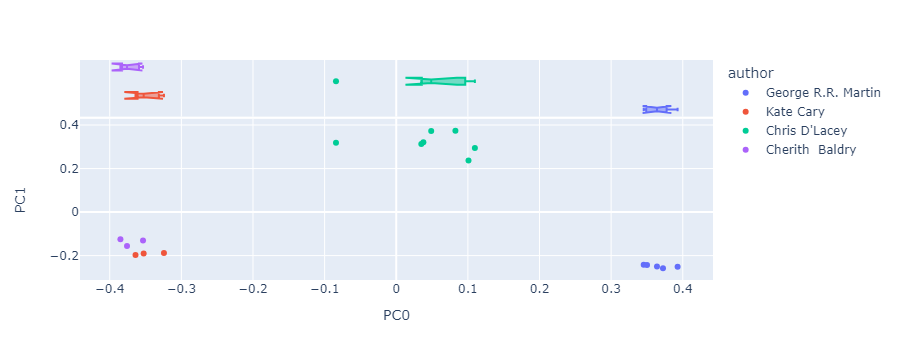

In [19]:
vis_pcs(DCM, 0, 1)

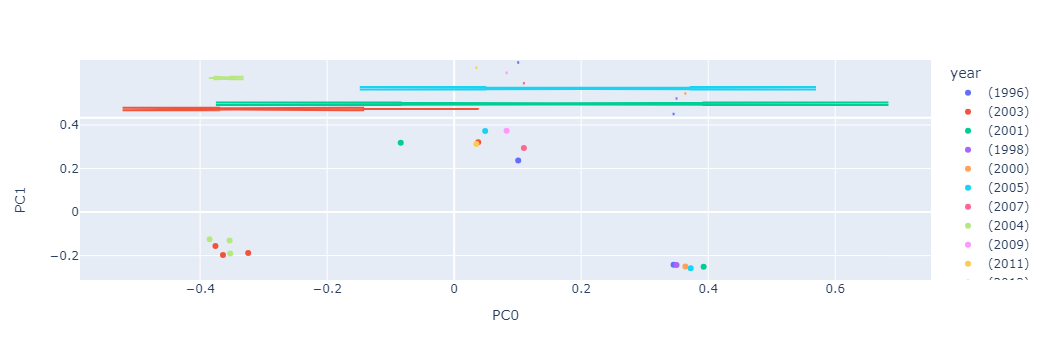

In [20]:
vis_pcs(DCM, 0, 1, label='year')

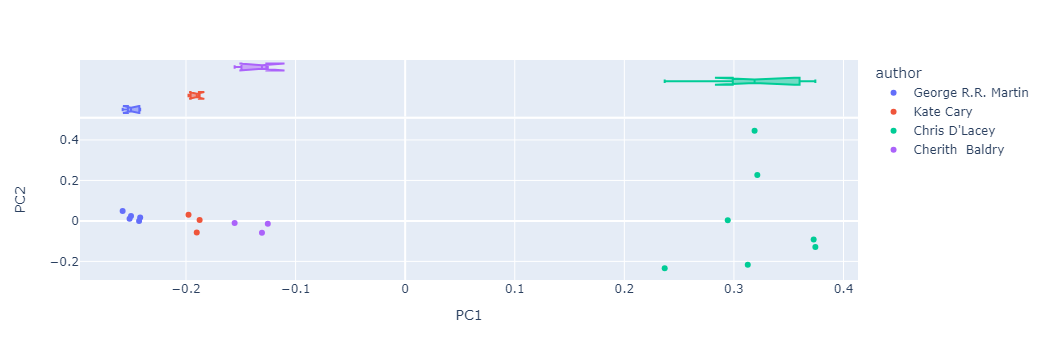

In [21]:
vis_pcs(DCM, 1, 2)

In [22]:
import time
import plotly.io as pio

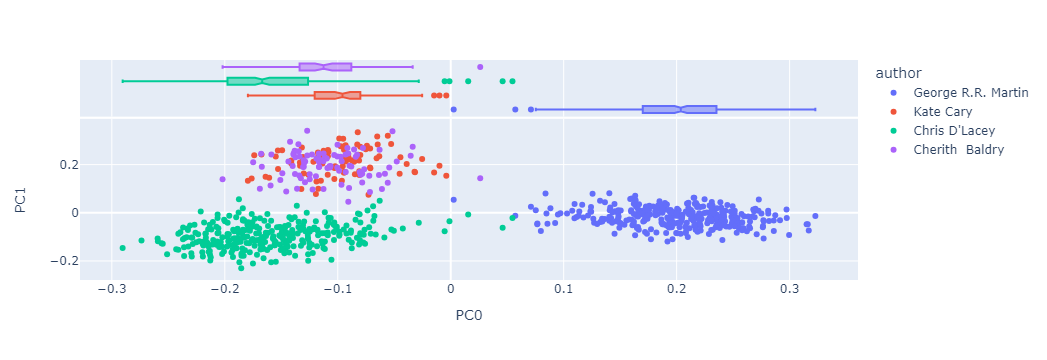

In [23]:
fig = vis_pcs(DCM2, 0, 1)
fig

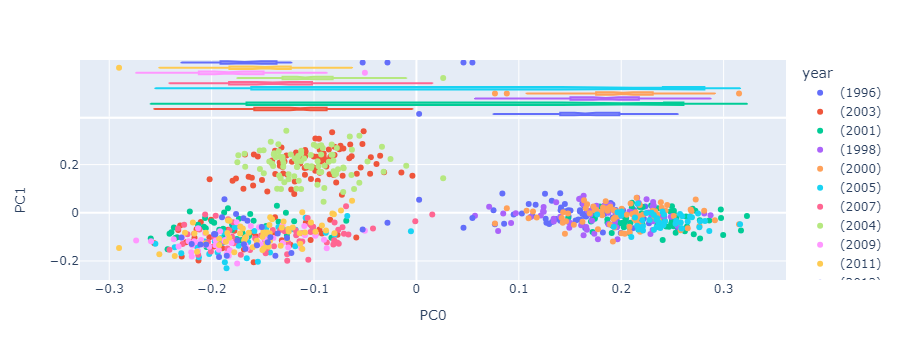

In [24]:
vis_pcs(DCM2, 0, 1, label='year')

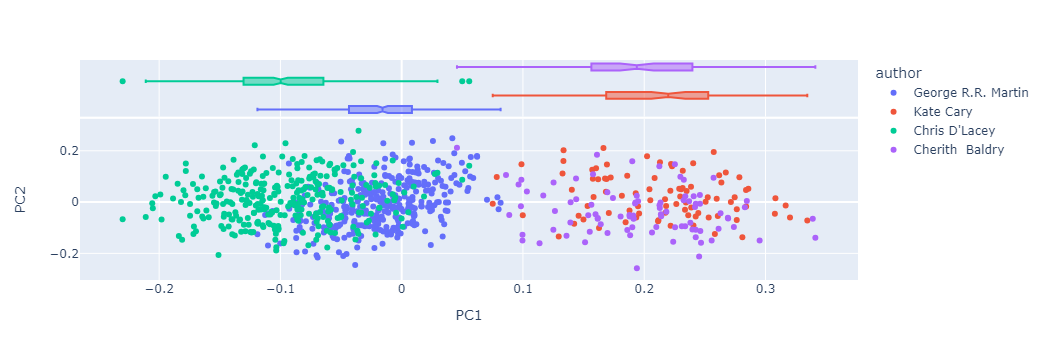

In [25]:
fig = vis_pcs(DCM2, 1, 2)
# fig.write_image(f"{output_dir}\\pca_v2_chaps.png")
fig

In [26]:
DCM.to_csv(f"{output_dir}\\DCM_books.csv")
DCM2.to_csv(f"{output_dir}\\DCM_chaps.csv")

### PCA Loadings

In [27]:
LOADINGS = pd.DataFrame(pca_engine.components_.T * np.sqrt(pca_engine.explained_variance_))
LOADINGS.columns = ["PC{}".format(i) for i in LOADINGS.columns]
LOADINGS.index = tfidf_books.columns
LOADINGS.index.name = 'term_str'

LOADINGS2 = pd.DataFrame(pca_engine.components_.T * np.sqrt(pca_engine.explained_variance_))
LOADINGS2.columns = ["PC{}".format(i) for i in LOADINGS2.columns]
LOADINGS2.index = tfidf_chaps.columns
LOADINGS2.index.name = 'term_str'

In [28]:
top_terms_sk = {}

data = []
for i in range(n_comps):
    for j in [0, 1]:
        data.append((f"PC{i}", j, ' '.join(LOADINGS.sort_values(f'PC{i}', ascending=bool(j)).head(10).index.to_list())))

comp_strs = pd.DataFrame(data)
comp_strs.columns =  ['pc', 'pole', 'top_terms']
comp_strs = comp_strs.set_index(['pc', 'pole'])

top_terms_sk2 = {}

data2 = []
for i in range(n_comps):
    for j in [0, 1]:
        data2.append((f"PC{i}", j, ' '.join(LOADINGS2.sort_values(f'PC{i}', ascending=bool(j)).head(10).index.to_list())))

comp_strs2 = pd.DataFrame(data2)
comp_strs2.columns =  ['pc', 'pole', 'top_terms']
comp_strs2 = comp_strs2.set_index(['pc', 'pole'])

In [29]:
comp_strs.unstack()

top_terms  \
pole                                                  0   
pc                                                        
PC0   evil spiked equal brittle fierce endless neces...   
PC1   ominous scornful utter interested common young...   
PC2   shattered public equal guilty scornful giant a...   

                                                         
pole                                                  1  
pc                                                       
PC0   scornful entire sweet friendly fellow peaceful...  
PC1   sweet shattered brittle dumb wooden rare fello...  
PC2   ten peaceful lighter unfamiliar friendly upset...

In [30]:
comp_strs2.unstack()

top_terms  \
pole                                                  0   
pc                                                        
PC0   hundred bloody black red sweet golden high dea...   
PC1   nest gray familiar amber former fern fine firs...   
PC2   human frozen black cold gray dark broken giant...   

                                                         
pole                                                  1  
pc                                                       
PC0   gray re polar isn special ve m sure worried right  
PC1   polar human red ten little large special perfe...  
PC2     m ve ll good isn pleased sure happy best eunuch

In [31]:
LOADINGS.head(2)

PC0       PC1       PC2
term_str                              
frail     0.017395  0.007202  0.000718
generous  0.010018  0.005655 -0.006356

In [32]:
VSHORT_books = pd.read_csv(f"{output_dir}\\VSHORT_books.csv").set_index('term_str')
VSHORT_chaps = pd.read_csv(f"{output_dir}\\VSHORT_chaps.csv").set_index('term_str')

In [33]:
VSHORT_books.head(2)

n max_pos      dfidf  mean_tfidf
term_str                                   
frail     62      JJ  18.774517    2.303629
generous  43      JJ  18.774517    1.794052

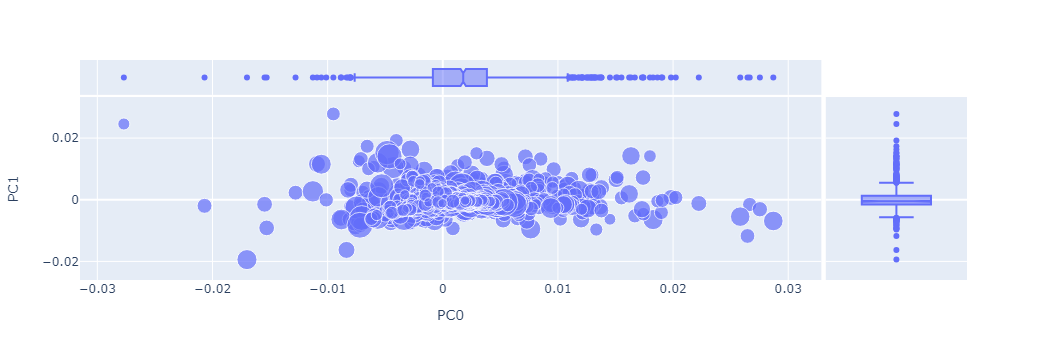

In [34]:
px.scatter(LOADINGS.join(VSHORT_books).reset_index(), 'PC0', 'PC1', hover_name='term_str', 
           size='mean_tfidf', 
           marginal_x='box', marginal_y='box', height=1000)

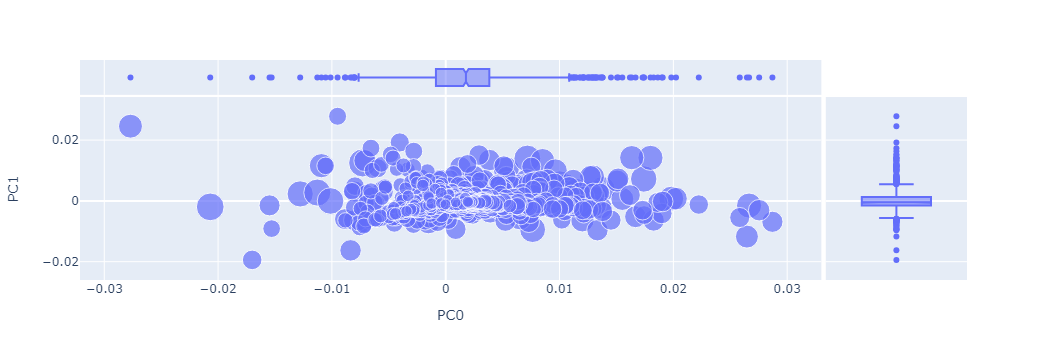

In [35]:
fig = px.scatter(LOADINGS2.join(VSHORT_chaps).reset_index(), 'PC0', 'PC1', hover_name='term_str', 
           size='mean_tfidf', 
           marginal_x='box', marginal_y='box', height=1000)
# fig.write_image(f"{output_dir}\\pca_v1.2_chaps.png")
fig

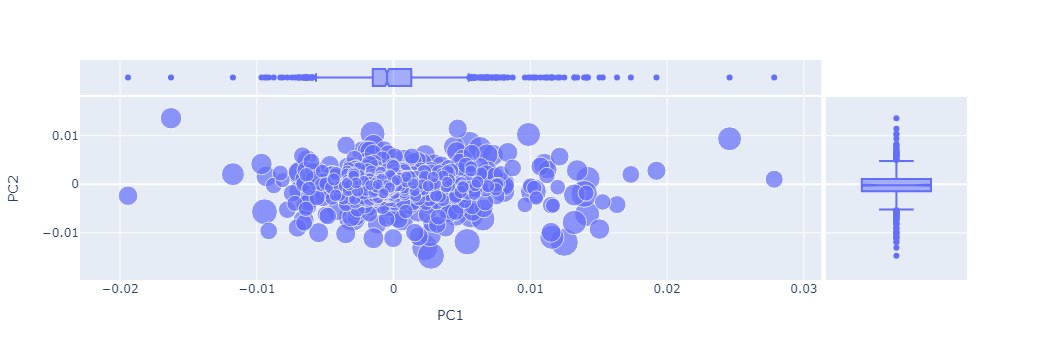

In [36]:
fig = px.scatter(LOADINGS2.join(VSHORT_chaps).reset_index(), 'PC1', 'PC2', hover_name='term_str', 
           size='mean_tfidf', 
           marginal_x='box', marginal_y='box', height=1000)
# fig.write_image(f"{output_dir}\\pca_v2.2_chaps.png")
fig

### More Vis

In [37]:
DOC_books = pd.DataFrame(index=tfidf_books.index).join(LIB)
# DOC_books.head(2)

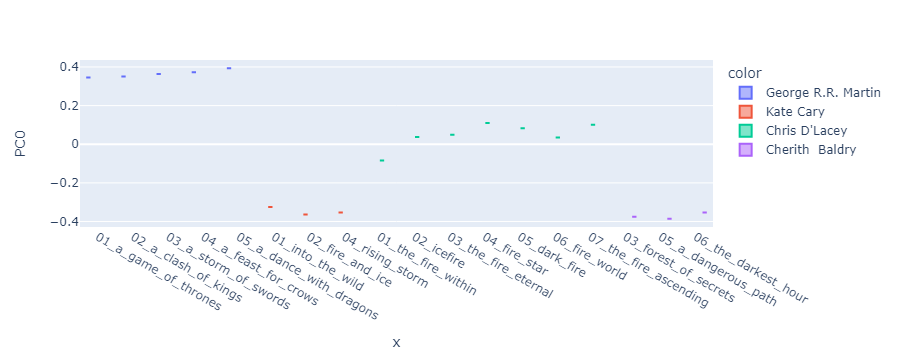

In [38]:
px.box(DCM, x=DOC_books.index, y='PC0', height=500, color=DOC_books.author)

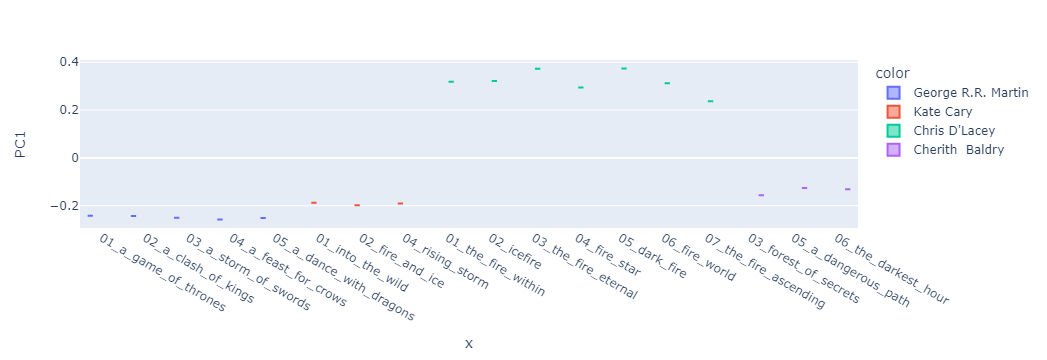

In [39]:
px.box(DCM, x=DOC_books.index, y='PC1', height=500, color=DOC_books.author)

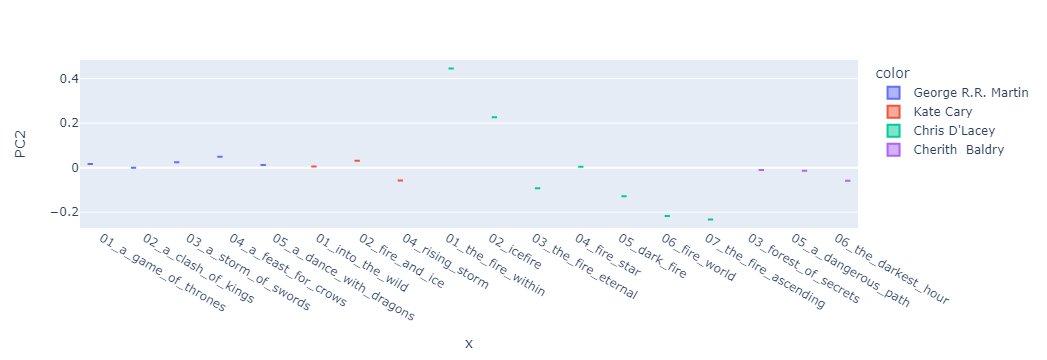

In [40]:
px.box(DCM, x=DOC_books.index, y='PC2', height=500, color=DOC_books.author)

In [41]:
DOC_chaps = pd.DataFrame(index=tfidf_chaps.index).join(LIB)
# DOC_chaps.head(2)

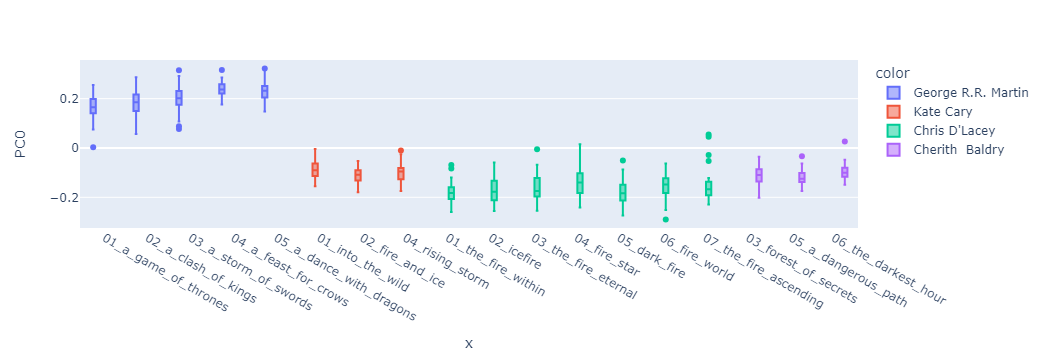

In [42]:
px.box(DCM2, x=DOC_chaps.index.get_level_values(0), y='PC0', height=500, color=DOC_chaps.author)

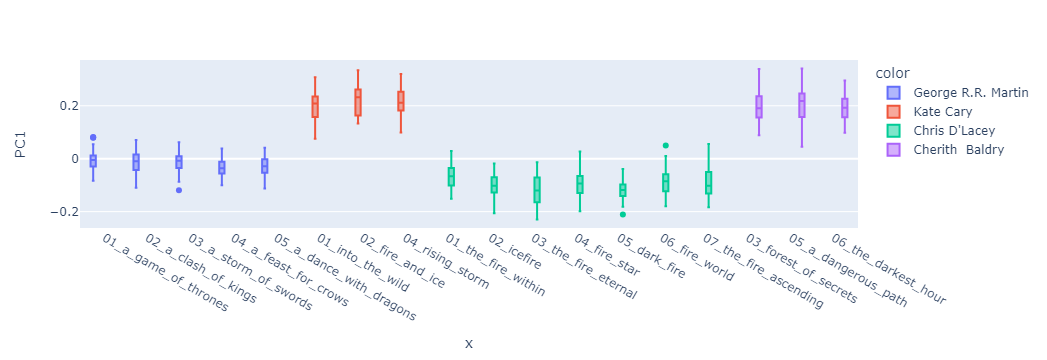

In [43]:
px.box(DCM2, x=DOC_chaps.index.get_level_values(0), y='PC1', height=500, color=DOC_chaps.author)

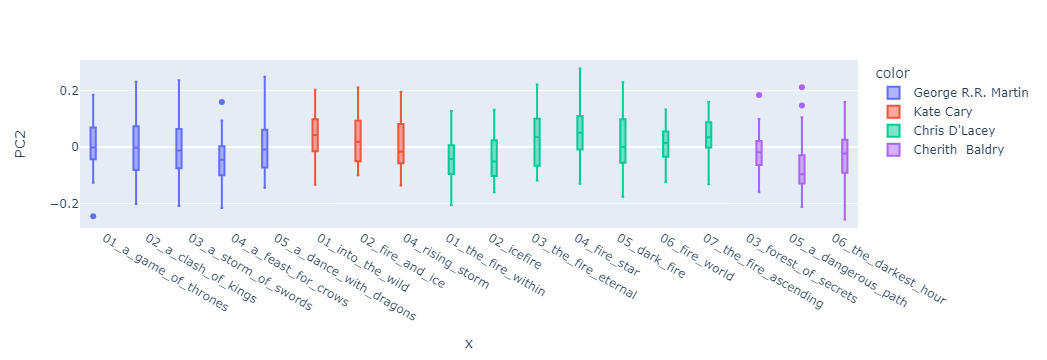

In [44]:
px.box(DCM2, x=DOC_chaps.index.get_level_values(0), y='PC2', height=500, color=DOC_chaps.author)